In [1]:
# Import the required layers and modules to create our convolution neural net architecture

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [4]:
# Load the dataset from keras datasets module

from keras.datasets import cifar10
import matplotlib.pyplot as plt
 
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

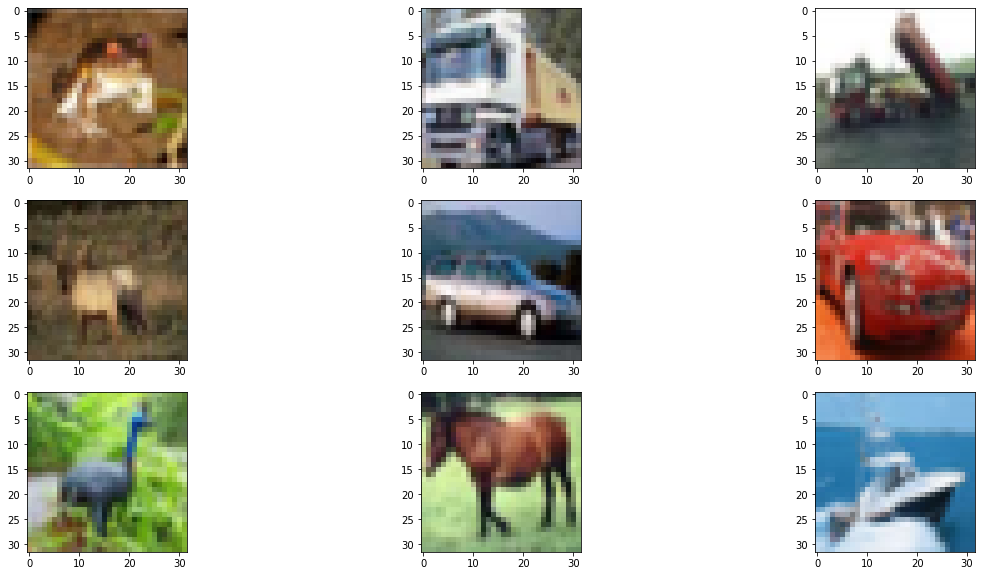

In [5]:
# Plot some images from datset

plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(train_X[i])
plt.show()

In [6]:
# Convert the pixel values of the dataset to float type and then normalize the dataset

train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

In [7]:
# hot encoding

train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]

In [8]:
# Create the sequential model and add the layers

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [9]:
# Configure the optimizer and compile the model

sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [ ]:
# Train the model

model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=10,batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 125s 79ms/step - loss: 1.5749 - accuracy: 0.4319 - val_loss: 1.3007 - val_accuracy: 0.5295
Epoch 2/10
1324/1563 [========================>.....] - ETA: 18s - loss: 1.2613 - accuracy: 0.5493

In [ ]:
#  Calculate its accuracy on testing data

_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

In [ ]:
#  Save the model

model.save("model1_cifar_10epoch.h5")


In [2]:
# Make a dictionary to map to the output classes and make predictions from the model

results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("abc.png")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
s=results[pred]
s=s.capitalize()
print('In the given image, object is detected as "{}"'.format(s))

In the given image, object is detected as "Aeroplane"


In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

#load the trained model to classify the images

from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')

#dictionary to label all the CIFAR-10 dataset classes.

classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}
#initialise GUI

top=tk.Tk()
top.geometry('800x600')
top.title('OBJECT DETECTION SYSTEM ')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('roboto',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    s=(classes[pred]).capitalize()
    sign = "Prediction : {}".format(s)
    print("Prediction : {}".format(sign))
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
        (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an Image For Prediction",command=upload_image,
  padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
    font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="OBJECT DETECTION SYSTEM",pady=20, font=('roboto',20,'bold'))

heading.configure(background='#CDCDCD',foreground='#364156')
names= Label(top ,text="""AKASH MODANWAL 20MCMB24 
VIKAS KUMAR 20MCMB11
ABHINAV YADAV 20MCMB10""",pady=20 ,font=('roboto',12,'bold'))
names.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
names.pack()
top.mainloop()

/home/akash/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction : Prediction : Automobile
Prediction : Prediction : Automobile
